# Forecasting Closing Prices of HDFC Bank

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt


C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load and Prepare Data

In [2]:

data = pd.read_csv('HDFCBANK.csv')
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
491,9/18/2023,1653.75,1655.000000,1626.099976,1629.050049,1629.050049,18528144
492,9/20/2023,1599.00,1599.000000,1560.400024,1563.699951,1563.699951,57737324
493,9/21/2023,1553.00,1568.949951,1537.050049,1553.349976,1553.349976,36420721
494,9/22/2023,1559.00,1564.400024,1523.750000,1529.650024,1529.650024,30852125
495,9/25/2023,1525.00,1540.699951,1525.000000,1531.000000,1531.000000,20104377


In [3]:
data.shape

(496, 7)

## Exploratory data analysis (EDA)

In [4]:
data=data[['Date','Close']]
data.head()

,Date,Close
0,9/27/2021,1625.099976
1,9/28/2021,1615.050049
2,9/29/2021,1593.849976
3,9/30/2021,1594.949951
4,10/1/2021,1582.699951


In [5]:
# to get range of Month Column (i.e. 1st date and last date)
#use double collon (" ") for f 
print(f"Range of Closing Price Dates is from - {data.loc[:,'Date'][0]} to {data.loc[:,'Date'][len(data)-1]}")
#-1 because indexing starts from 0, so if len =10 then the last value index will be (10-1) i.e len-1

Range of Closing Price Dates is from - 9/27/2021 to 9/25/2023


In [6]:

data['Date'] = pd.to_datetime(data['Date'])  #changed Date column to datetime format
data.set_index('Date', inplace=True) #Making Date Column as Index
data.head()

,Close
Date,
2021-09-27,1625.099976
2021-09-28,1615.050049
2021-09-29,1593.849976
2021-09-30,1594.949951
2021-10-01,1582.699951


In [7]:
data.shape

(496, 1)

In [8]:
data = data.asfreq('W-MON')   #Weekly data
data.head()


,Close
Date,
2021-09-27,1625.099976
2021-10-04,1585.750000
2021-10-11,1633.800049
2021-10-18,1670.300049
2021-10-25,1657.000000


In [9]:
data['Close'].isnull().sum()

2

In [10]:
# Replace NaN values with the previous non-null value in each column
data = data.fillna(method='ffill')

# Print the DataFrame with NaN values replaced
data['Close'].isnull().sum()

0

## Visualize Data

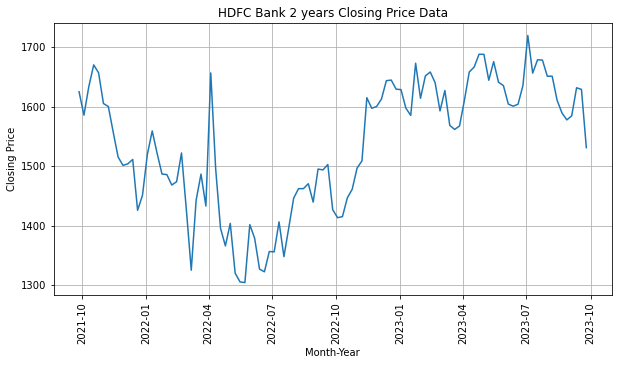

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(data)
plt.title('HDFC Bank 2 years Closing Price Data')
plt.xlabel('Month-Year')
plt.ylabel('Closing Price')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

In [12]:
data.describe()

,Close
count,105.000000
mean,1536.419534
std,108.714978
min,1304.000000
25%,1450.800049
50%,1561.750000
75%,1629.449951
max,1719.800049


## BoxPlot

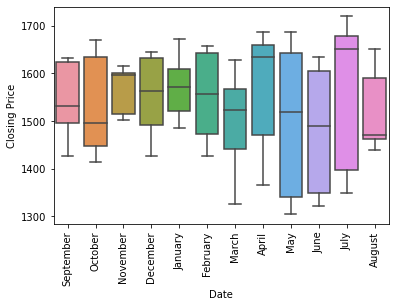

In [13]:
import seaborn as sns

sns.boxplot(x=data.index.month_name(),y=data.values[:,0])
plt.ylabel('Closing Price')
plt.xticks(rotation='vertical')
plt.show()

## Plotting 2 months data data 

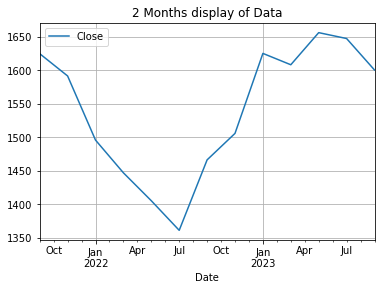

In [14]:
#we have data from 1949 to 1960 means total 12 years

data_yearly_sum=data.resample('2M').mean()
data_yearly_sum.plot()
plt.title('2 Months display of Data')
plt.grid()

## Plotting Quaterly data

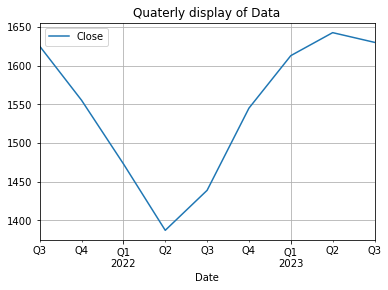

In [15]:
#Divide in quaters

data_quaterly_sum=data.resample('Q').mean()

data_quaterly_sum.plot()
plt.title('Quaterly display of Data')
plt.grid()

In [16]:
#more data , do it for 10 years as well (10Y)
#do it for 5 years as well (5Y)

## Mean

In [17]:
#Average Passengers Travelling

data1=data.groupby(data.index.month).mean().rename(columns={'Close':'Mean'})
data1.tail()

,Mean
Date,
8,1523.266683
9,1546.594469
10,1531.038900
11,1566.761122
12,1552.787506


## Standard Deviation

In [18]:
data1=data1.merge(data.groupby(data.index.month).std().rename(columns={'Close':'std'}),left_index=True,right_index=True)
data1.head()

,Mean,std
Date,,
1,1567.140002,63.238410
2,1554.193741,93.020121
3,1501.462524,98.520093
4,1567.243759,129.769813
5,1501.915002,167.734153


## Assessing relative variability

In [19]:
data1['Cvar']=(data1['std']/data1['Mean'])*100
data1.head()

,Mean,std,Cvar
Date,,,
1,1567.140002,63.238410,4.035275
2,1554.193741,93.020121,5.985105
3,1501.462524,98.520093,6.561609
4,1567.243759,129.769813,8.280130
5,1501.915002,167.734153,11.168019


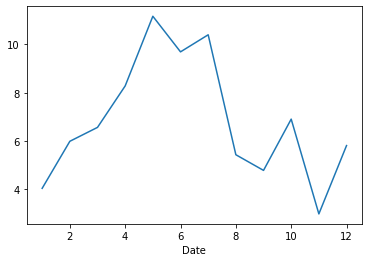

In [20]:
data1['Cvar'].plot()
plt.show()

## Decompose Seasonality

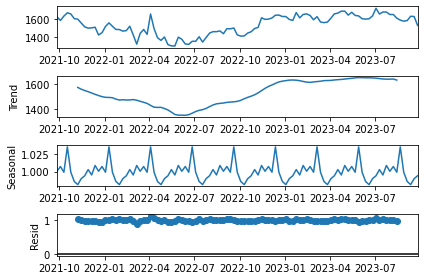

In [21]:
result = seasonal_decompose(data, model='multiplicative', period=12)
result.plot()
plt.show()

## Splitting Data into Training and Testing sets

In [22]:
train_size = int(len(data) * 0.80)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [23]:
print('Training shape : ',train.shape)
print('Testing shape : ',test.shape)

Training shape :  (84, 1)
Testing shape :  (21, 1)


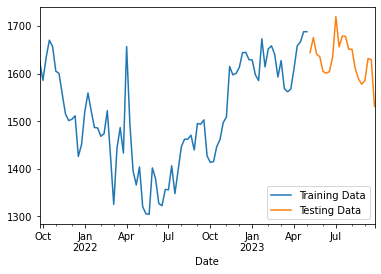

In [24]:
#ploting Train and test data.

train['Close'].plot()
test['Close'].plot()

plt.legend(['Training Data','Testing Data'])
plt.show()

In [25]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+len(train)+1 for i in range(len(test))]

In [26]:
print('Training time' ,train_time)
print()
print('Testing time',test_time)

Training time [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]

Testing time [85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]


## LR=LinearRegression for Training data

In [27]:
LR_train=train.copy()
LR_test=test.copy()

In [28]:
# New time column is created
LR_train['time']=train_time
LR_test['time']=test_time

In [29]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(LR_train[['time']],LR_train['Close'].values)

LinearRegression()

## Prediction on Testing Data

In [30]:
Test_predict=LR.predict(LR_test[['time']])
LR_test['forecast']=Test_predict


## Plotting Regression Line on Test Data

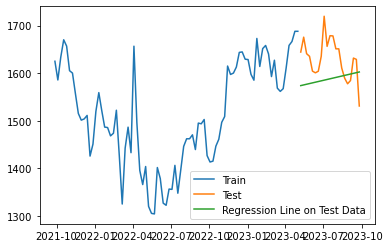

In [31]:

plt.plot(train['Close'],label='Train')
plt.plot(test['Close'],label='Test')
plt.plot(LR_test['forecast'],label='Regression Line on Test Data')
plt.legend()
plt.show()

## Mean absolute percentage error

The mean absolute percentage error, also known as mean absolute percentage deviation, is a measure of prediction accuracy of a forecasting method in statistics. 


In [32]:
def mape(actual,predicted):
    return round((np.mean(abs(actual-predicted)/actual))*100,2)

In [33]:
mape_model_test=mape(test['Close'].values,Test_predict)
print('MAPE is %3.3f '%(mape_model_test),'%')


MAPE is 3.180  %


In [34]:
results=pd.DataFrame({'Test MAPE (%)': [mape_model_test]},index=['RegressionOnTime'])
results


,Test MAPE (%)
RegressionOnTime,3.18


## NB= NaiveBayes for Training and Testing Data

In [35]:
from sklearn.naive_bayes import GaussianNB

NB_train=train.copy()
NB_test=test.copy()
# NB = Naive Byes

In [36]:
NB_test['naive']=np.asarray(NB_train['Close'])[len(np.asarray(NB_train['Close']))-1]
NB_test['naive'].head()

Date
2023-05-08    1688.150024
2023-05-15    1688.150024
2023-05-22    1688.150024
2023-05-29    1688.150024
2023-06-05    1688.150024
Freq: W-MON, Name: naive, dtype: float64

In [37]:
test['Close'].head()

Date
2023-05-08    1644.449951
2023-05-15    1675.800049
2023-05-22    1641.050049
2023-05-29    1635.500000
2023-06-05    1604.400024
Freq: W-MON, Name: Close, dtype: float64

## Plotting Naive forecast on test data

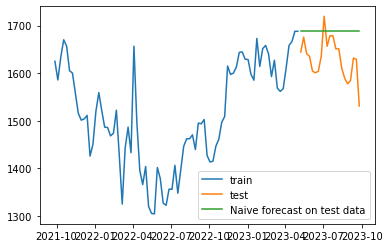

In [38]:
plt.plot(NB_train['Close'],label='train')
plt.plot(test['Close'],label='test')
plt.plot(NB_test['naive'],label='Naive forecast on test data')
plt.legend()

In [39]:
mape_modelNB_test=mape(test['Close'].values,NB_test['naive'].values)
print('For Naive Forecast on Test Data, MAPE is %3.3f '%(mape_modelNB_test),'%')


For Naive Forecast on Test Data, MAPE is 3.800  %


In [40]:
resultsNB=pd.DataFrame({'Test MAPE (%)': [mape_modelNB_test]},index=['NaiveModel'])
results=pd.concat([results,resultsNB])
results


,Test MAPE (%)
RegressionOnTime,3.18
NaiveModel,3.80


## Final model of Exponental Smoothing

In [41]:
model = ExponentialSmoothing(data,
                             trend='add',
                             seasonal='add',
                            seasonal_periods=7)
fit_model = model.fit(smoothing_level=0.4,
                     smoothing_trend=0.3,
                     smoothing_seasonal=0.6)


In [42]:
MAPE_final_model=mape(data['Close'].values,fit_model.fittedvalues)
print('MAPE:',MAPE_final_model)

MAPE: 3.68


In [43]:
forecast = fit_model.forecast(steps=len(test))

In [44]:
pred_data = pd.DataFrame({
    'lower CI': forecast - 1.96 * np.std(fit_model.resid, ddof=1),
    'prediction': forecast,
    'upper CI': forecast + 1.96 * np.std(fit_model.resid, ddof=1)
})


pred_data.head()

,lower CI,prediction,upper CI
2023-10-02,1414.155528,1560.662838,1707.170149
2023-10-09,1431.579930,1578.087241,1724.594551
2023-10-16,1421.054347,1567.561658,1714.068969
2023-10-23,1427.867000,1574.374311,1720.881621
2023-10-30,1450.170041,1596.677352,1743.184662


## Plotting forecast with confidence band

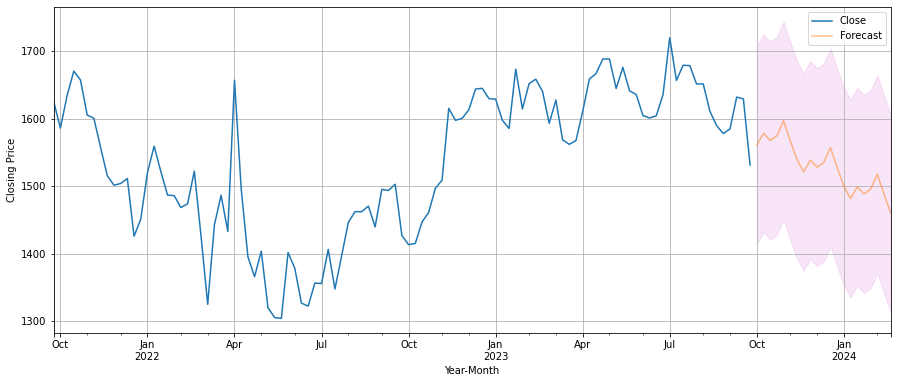

In [45]:
axis=data.plot(label='Actual',figsize=(15,6))
pred_data['prediction'].plot(ax=axis,label='Forecast',alpha=0.50)
axis.fill_between(pred_data.index,pred_data['lower CI'],pred_data['upper CI'],color='m',alpha=0.10)


axis.set_xlabel('Year-Month')
axis.set_ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()